src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [48]:
import tensorflow as tf

In [49]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [50]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [51]:
import numpy as np
from matplotlib import pyplot as plt

In [52]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2813 files belonging to 22 classes.


In [53]:
data_iterator = data.as_numpy_iterator()

In [54]:
batch = data_iterator.next()

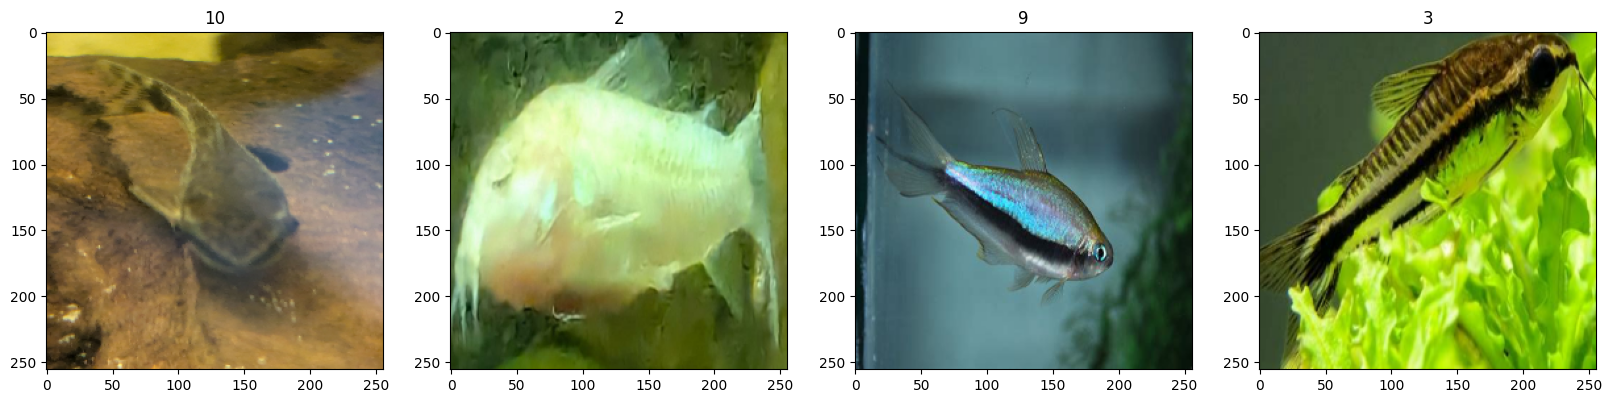

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [56]:
data = data.map(lambda x,y: (x/255, y))

In [57]:
data.as_numpy_iterator().next()

(array([[[[2.58823544e-01, 2.11764708e-01, 7.84313772e-03],
          [2.62766331e-01, 2.15707511e-01, 1.17859486e-02],
          [2.66686410e-01, 2.23529413e-01, 1.17745791e-02],
          ...,
          [3.56433809e-01, 2.74080873e-01, 2.68886201e-02],
          [3.70471597e-01, 2.88118660e-01, 4.09066603e-02],
          [3.84237140e-01, 3.01884204e-01, 4.69822288e-02]],
 
         [[2.59053320e-01, 2.11994484e-01, 8.07291642e-03],
          [2.63896435e-01, 2.16773897e-01, 1.27886003e-02],
          [2.68078029e-01, 2.23529413e-01, 1.24703804e-02],
          ...,
          [3.60708743e-01, 2.78355807e-01, 2.44056247e-02],
          [3.75842512e-01, 2.93489575e-01, 3.81280631e-02],
          [3.80621940e-01, 2.98269004e-01, 4.29074764e-02]],
 
         [[2.63128072e-01, 2.15686277e-01, 1.17647061e-02],
          [2.65580058e-01, 2.17156857e-01, 1.18709188e-02],
          [2.74559170e-01, 2.23578781e-01, 1.56369079e-02],
          ...,
          [3.68715942e-01, 2.86696613e-01, 3.0361

# Split Data

In [58]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [59]:
train_size

61

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [61]:
train_images = []
train_labels = []

In [62]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-12 22:43:23.081178: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [63]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [64]:
val_images = []
val_labels = []

In [65]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([ 7,  9, 19, 11, 16,  6, 13, 14,  7, 13,  1,  1,  9, 13, 20, 10, 11,
        9, 15, 14,  7, 10, 16,  9, 10,  9,  5,  4, 16,  5,  2, 21],
      dtype=int32), array([ 1, 16, 19, 20, 15,  7,  6,  6,  6, 11, 13,  4, 13, 12,  4, 18,  5,
       16, 16, 15, 10, 20,  7, 10, 20, 20,  7,  9, 12,  0,  9, 19],
      dtype=int32), array([ 9, 16, 16, 10, 15, 12, 18, 10, 13, 10,  2, 10, 16,  0, 14,  4,  6,
       19, 21, 16,  1, 16, 21,  5,  5, 14, 10, 11,  7, 13,  2, 16],
      dtype=int32), array([10,  4,  9, 14, 21,  9,  6,  7, 14, 19, 19,  8,  9, 20, 18, 14,  4,
        5,  5, 10,  6,  0, 20,  3, 14,  3, 14,  7,  7, 18,  9, 13],
      dtype=int32), array([ 2, 15, 10, 16,  8,  7,  8, 19,  6, 19, 15,  7,  7, 10,  6, 16,  2,
        7,  1,  9,  1,  0, 10,  4,  1, 17, 15,  5,  9,  9, 16,  3],
      dtype=int32), array([ 1, 11, 15, 15,  6, 12, 11, 13,  6,  2, 16,  1,  9, 11, 13,  0,  5,
        1, 10, 13,  7, 12,  5, 16,  1, 15,  1,  9,  7,  1, 20, 10],
      dt

In [66]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [67]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [69]:
model = Sequential()

In [70]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

In [71]:
from tensorflow.keras.utils import to_categorical

In [72]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (1952, 256, 256, 3)
train_labels_one_hot shape: (1952, 22)
val_images shape: (544, 256, 256, 3)
val_labels_one_hot shape: (544, 22)


In [73]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [75]:
logdir='logs'

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.1044 - loss: 2.9577 - val_accuracy: 0.2831 - val_loss: 2.5276
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 377ms/step - accuracy: 0.3045 - loss: 2.4097 - val_accuracy: 0.4540 - val_loss: 1.9438
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.4969 - loss: 1.7475 - val_accuracy: 0.5018 - val_loss: 1.8074
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 379ms/step - accuracy: 0.6638 - loss: 1.1849 - val_accuracy: 0.5901 - val_loss: 1.5949
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.8251 - loss: 0.5975 - val_accuracy: 0.5882 - val_loss: 1.6915
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.9169 - loss: 0.3179 - val_accuracy: 0.6121 - val_loss: 1.9657
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step - accuracy: 0.9734 - loss: 0.1443 - val_accuracy: 0.6324 - val_loss: 1.8458
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 387ms/step - accuracy: 0.9819 - loss: 0.0977 - val_accu

# Plot Performance

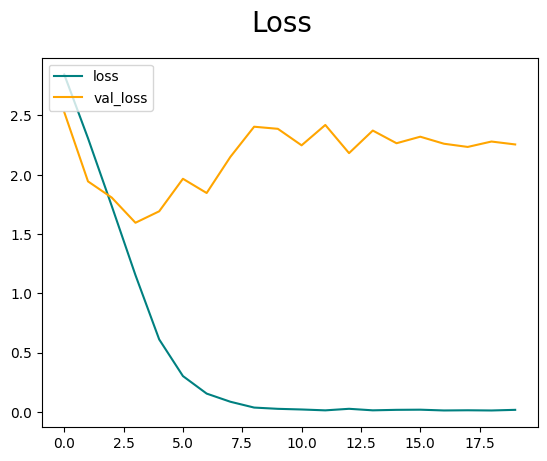

In [78]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

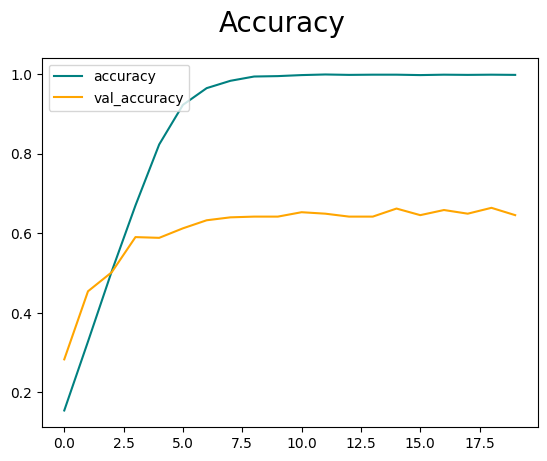

In [79]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [80]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [81]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [82]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Precision: 0.5833333134651184
Recall: 0.51953125
Accuracy: 0.546875


# Test

In [83]:
import cv2

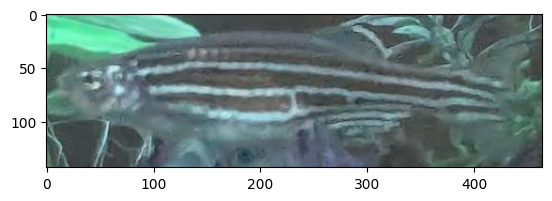

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted class is(Danio_rerio): Hyphessobrycon_amandae


In [84]:
img = cv2.imread('test_pictures/Danio_rerio.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Danio_rerio): {class_names[predicted_class]}')

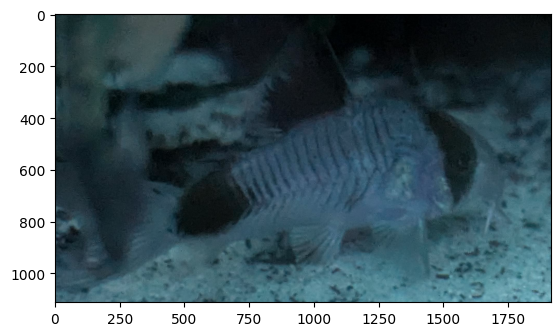

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Corydoras_Panda): Danio_rerio


In [85]:
img = cv2.imread('test_pictures/Corydoras_Panda.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_Panda): {class_names[predicted_class]}')

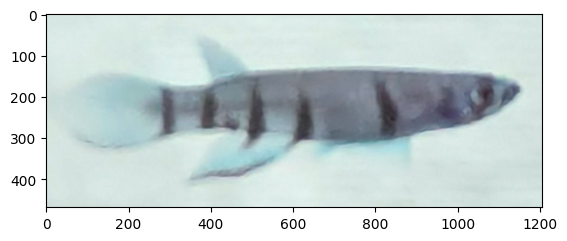

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Epiplatys_dageti): Otocinclus_affinis


In [86]:
img = cv2.imread('test_pictures/Epiplatys_dageti.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Epiplatys_dageti): {class_names[predicted_class]}')

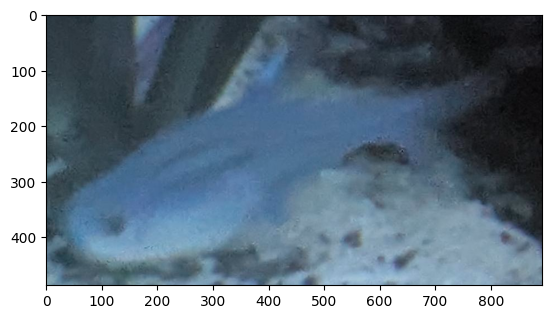

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Hyphessobrycon_amandae): Crossocheilus_reticulatus


In [87]:
img = cv2.imread('test_pictures/Hyphessobrycon_amandae.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Hyphessobrycon_amandae): {class_names[predicted_class]}')

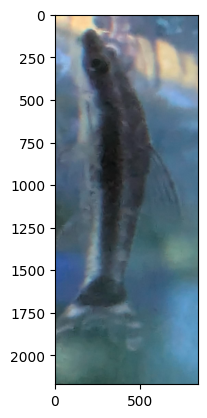

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Otocinclus_affinis): boraras_Merah


In [88]:
img = cv2.imread('test_pictures/Otocinclus_affinis.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Otocinclus_affinis): {class_names[predicted_class]}')

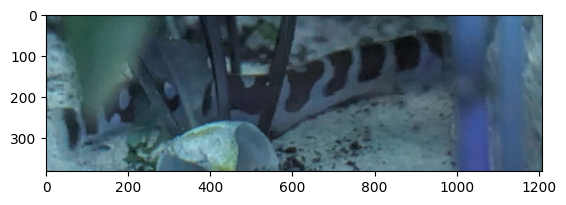

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Pangio_kuhlii): boraras_Naevus


In [89]:
img = cv2.imread('test_pictures/Pangio_kuhlii.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_kuhlii): {class_names[predicted_class]}')

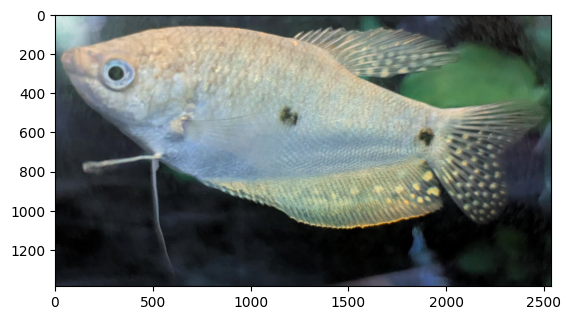

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Trichogaster_trichopterus): Trichogaster_trichopterus


In [90]:
img = cv2.imread('test_pictures/Trichogaster_trichopterus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Trichogaster_trichopterus): {class_names[predicted_class]}')

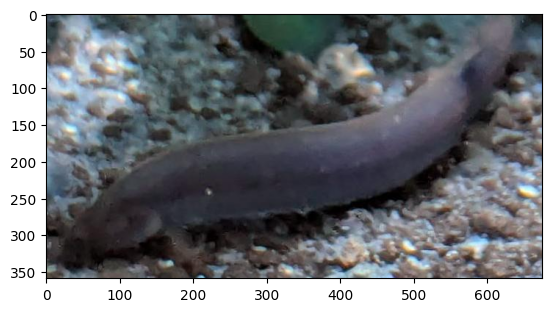

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Pangio_pangia): Pangio_kuhlii


In [91]:
img = cv2.imread('test_pictures/Pangio_pangia.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_pangia): {class_names[predicted_class]}')

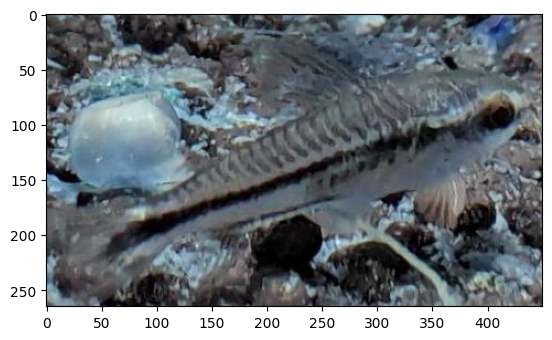

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Corydoras_pygmaeus): Crossocheilus_reticulatus


In [92]:
img = cv2.imread('test_pictures/Corydoras_pygmaeus.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_pygmaeus): {class_names[predicted_class]}')

# Save the Model